# Bond Portfolio Example

Optimizing the allocation of bonds in a Portfolio to maximize return. Correctly divide a bond portfolio among bonds of different yield, maturity, and risk or in order to maximize yield or minimize risk. 

**Problem:**  
Correctly divide a bond portfolio among 4 bonds of varying yields and maturities in order to achieve an overall bond portfolio with an average maturity of 5.5 years while maximizing overall yield.

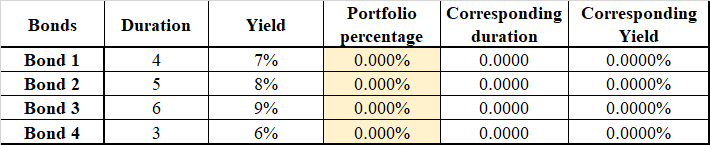

In [3]:
from pulp import *

prob=LpProblem('Maximize Yield',LpMaximize)

bond=[" 1"," 2", " 3", " 4"]

#Capture information:

duration={bond[0]:4,
          bond[1]:5,
          bond[2]:6,
          bond[3]:3}

yields={bond[0]:.07,
       bond[1]:.08,
       bond[2]:.09,
       bond[3]:.06}

variables=LpVariable.dicts("Bonds", bond,0,None)

#Objective function is added
prob+=lpSum([variables[i]*yields[i] for i in bond])

#Constraints are added
prob+=lpSum([variables[i]*1 for i in bond])==1
prob+=lpSum([variables[i]*duration[i] for i in bond])==5.5

#Solve the problem:
prob.solve()

print('Status:',LpStatus[prob.status])
print('')
for v in prob.variables():
    print (v.name,'=',v.varValue)
print('')
print("Maximum Yield=",value(prob.objective))


Status: Optimal

Bonds__1 = 0.0
Bonds__2 = 0.0
Bonds__3 = 0.83333333
Bonds__4 = 0.16666667

Maximum Yield= 0.0849999999
